# Exercise 5 - Optimal interpolation


**Aim:** To map temperature data.

**Data:**  

**Directions:** Create an `*.ipynb` and 

<hr>

## Create a notebook 

1. Create an `*.ipynb` containing the commands for this assignment, or copy this file.  
    
    ```{admonition} File naming convention
    Name your python notebook something useful `ex<X>-<Lastname>-<slug>-seaocn.ipynb` where you replace `<X>` with the exercise number and `<slug>` with the short slug to name the topic, and `<Lastname>` with your last name.

    Figures should be named something like `ex<X>fig<Y>-<Lastname>-<slug>-seaocn.png` where you replace `<X>` with the exercise number, `<Y>` with the figure number, and `<Lastname>` with your last name.
    ```

2. Import necessary packages.  



    For example, `matplotlib` and `pandas` and `numpy` and `xarray`.  You may also need `scipy`.
    ```
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import xarray as xr
    from datetime import datetime
    ```
    If you are missing any of these packages, please refer to [Resources: Python](../resource/python).



In [1]:
# Your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import scipy.io as sio

# Some extra colormaps
import cmocean

# Fancy but non-intuitive
import pygmt



### Load Matlab data

3. Use the file `argo_med.mat` in the `data/` directory.  With the `scipy` package, you can load matlab-format data files into python.

    ```{seealso}
    Scipy io: [https://docs.scipy.org/doc/scipy/tutorial/io.html](https://docs.scipy.org/doc/scipy/tutorial/io.html)
    ```

4. Load the file.  Here, we're loading the matlab file into something called `mat_contents`.  Make a basic exploration. How big are the data?  What are the coordinates?

    ```
    mat_contents = sio.loadmat(fname)
    print(mat_contents.keys())
    print(mat_contents['time'])
    ```
    Since the functions you have available depend on the type of the variable, don't forget to use `type()` to find out what's in there.


In [28]:
# Your code here
file_path = '../data/'
filename = 'argo_med.mat'
fname = file_path + filename
mat_contents = sio.loadmat(fname)

#print(mat_contents.keys())
time = mat_contents['time']
pres0 = mat_contents['pres0']
latd = mat_contents['latd']
lond = mat_contents['lond']
tprof = mat_contents['tprof']



(1, 1019)

### Convert data to `xarray`

We like `xarray` in this course, so rather than handling these

In [26]:
#data_xr = xr.DataArray(data = tprof,
#                       coords={'time': time, 'pres': pres0},
#                       dims = ["time", "pres"])

MissingDimensionsError: cannot set variable 'pres' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

### Error: `MissingDimensionsError`

If you get an error like `MissingDimensionsError: cannot set variable 'pres' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.`, this is a problem with the `shape` or size of your pressure or time dimensions.  Xarray wants these to be 1-dimensional.

Try a `np.shape(time)` to see how big it is.

If it is 1-dimensional, it will return something like
```(1019,)```

If it is returning ```(1, 1019)```, this is 2-dimensional, and xarray is having trouble with it.

```{seealso}
We dealt with problems of dimensionality in [Ex-tseries](exercise-tseries.ipynb).  The solution there was a little magical function called `squeeze()` available in `xarray`.  Our variable here is a `numpy` array, but there also exists the function `numpy.squeeze()`.
```


In [47]:
# Your code here.  
# Note that several of the below commands produce output, but youll only see the latest output print to the screen.
# If you want to see the output of the others, encase it with `print(...)`
type(tprof)
np.shape(tprof)
type(latd)
np.shape(time)
time = time.squeeze()
np.shape(time)
pres0 = pres0.squeeze()
np.shape(pres0)
latd = latd.squeeze()
lond = lond.squeeze()

data_xr = xr.DataArray(name = 'tprof', data = tprof,
                       coords={'time': time, 'pres': pres0},
                       dims = ["time", "pres"])
data_xr2 = xr.DataArray(name = 'latd', data = latd,
                        coords = {'time': time},
                        dims = ["time"])
data_xr3 = xr.DataArray(name = 'lond', data = lond,
                        coords = {'time': time},
                        dims = ["time"])

argo_med = xr.merge([data_xr,data_xr2,data_xr3])

#argo_med = xr.combine_by_coords([data_xr, data_xr2,data_xr3])

print(argo_med)

<xarray.Dataset>
Dimensions:  (time: 1019, pres: 6)
Coordinates:
  * time     (time) float64 7.316e+05 7.316e+05 ... 7.317e+05 7.317e+05
  * pres     (pres) uint8 10 20 30 40 50 60
Data variables:
    tprof    (time, pres) float64 20.98 20.98 20.98 20.98 ... 9.966 9.793 9.707
    latd     (time) float64 30.29 30.8 30.39 31.33 ... 59.88 59.63 59.8 59.68
    lond     (time) float64 332.2 337.0 337.3 337.3 ... 304.2 325.5 326.3 339.4


### Plot data locations

This is a quick-and-dirty plot, so `matplotlib` is fine.

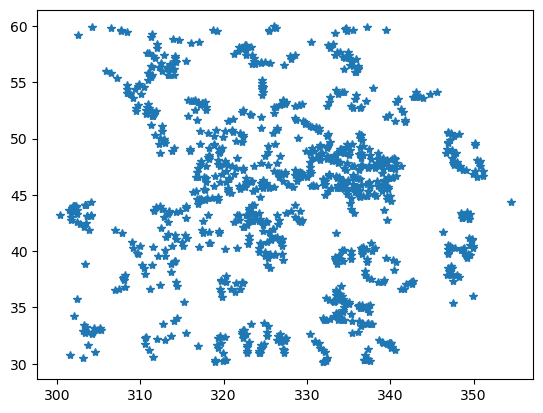

In [48]:
# Your code here
plt.plot(argo_med.lond, argo_med.latd,'*')

### Select a map region & pressure surface

```
minlat = 40
maxlat = 50
minlon = 320
maxlon = 340
```

We'll work with data in an area with particularly high density of float profiles.

Choose a pressure surface to work with. Note that your pressure vector is 6 elements long.  Pick one depth to work with.

In [55]:
minlat = 40
maxlat = 50
minlon = 320
maxlon = 340

# Figure out how big the datasets are
temp = argo_med['tprof'][:,0]
print(temp)

<xarray.DataArray 'tprof' (time: 1019)>
array([20.98333295, 19.66957312, 20.17708576, ...,  7.73461412,
        8.22999978, 11.18670421])
Coordinates:
  * time     (time) float64 7.316e+05 7.316e+05 ... 7.317e+05 7.317e+05
    pres     uint8 10


### Check for and remove bad data



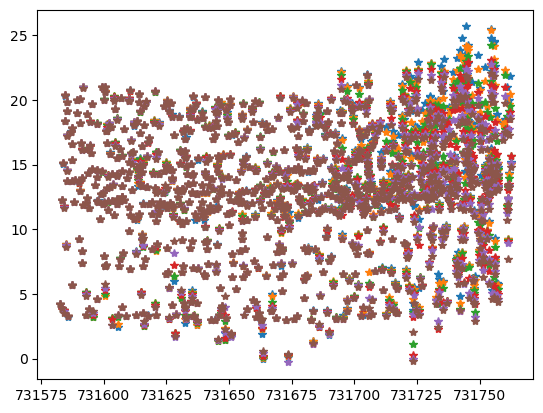

In [54]:
plt.plot(argo_med.time,argo_med.tprof,'*')

### Clip to a region

You've defined a maximum and minimum longitude and latitude above, and now you'd like to make your dataset smaller to work only within this region.

`xarray` has a few options for finding/selecting/choosing subsets of a dataset.  These include `xr.sel()`, `xr.where()`, `xr.loc()`, etc.  They have some similarities and differences which we won't go into here.

```{seealso}
If you do a google search for `subset xarray by lat lon region`, one of the options that shows up (as of 17 April 2024) is:
https://gis.stackexchange.com/questions/353698/how-to-clip-an-xarray-to-a-smaller-extent-given-the-lat-lon-coordinates

There are a few solutions offered by the community.  Try them and see which works.
```

<xarray.Dataset>
Dimensions:  (time: 306, pres: 6)
Coordinates:
  * time     (time) float64 7.316e+05 7.316e+05 ... 7.317e+05 7.318e+05
  * pres     (pres) uint8 10 20 30 40 50 60
Data variables:
    tprof    (time, pres) float64 15.19 15.19 15.19 15.19 ... 13.4 13.4 13.4
    latd     (time) float64 40.3 41.32 41.22 42.56 ... 49.67 49.54 49.49 49.86
    lond     (time) float64 336.5 325.7 326.4 321.2 ... 332.7 334.8 335.4 336.6


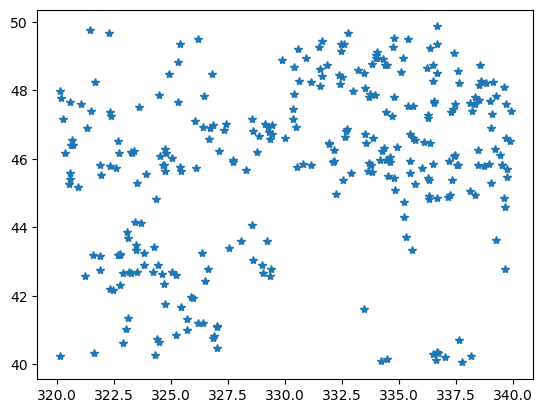

In [65]:
# This fails because our latitude and longitude vectors are 'variables' and time is the only coordinate
#cropped_ds = argo_med.sel(latd=slice(minlat,maxlat), lond=slice(minlon,maxlon))

mask_lon = (argo_med.lond >= minlon) & (argo_med.lond <= maxlon)
mask_lat = (argo_med.latd >= minlat) & (argo_med.latd <= maxlat)

argo_reg = argo_med.where(mask_lon & mask_lat, drop=True)

print(argo_reg)

plt.plot(argo_reg.lond,argo_reg.latd,'*')

### Remove mean & any obvious latitudinal dependence

```
plt.hist(argo_reg.tprof.values.flatten())
```

(array([  6.,   0.,  18.,  16., 267., 669., 471., 253.,  78.,  38.]),
 array([ 4.67600012,  6.12231186,  7.5686236 ,  9.01493534, 10.46124707,
        11.90755881, 13.35387055, 14.80018229, 16.24649403, 17.69280577,
        19.13911751]),
 <BarContainer object of 10 artists>)

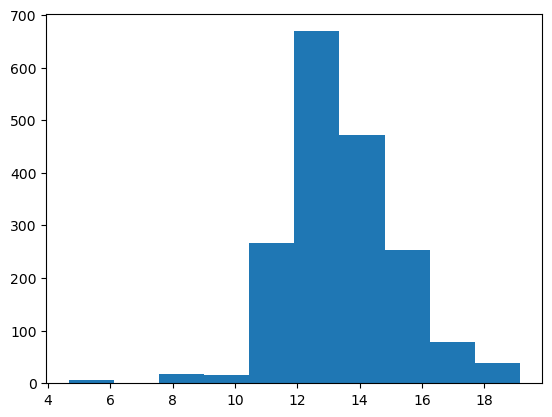

In [68]:
plt.hist(argo_reg.tprof.values.flatten())

### Making a seasonal  average

1. Now we're going to use some of the fancier features of the xarray data construction.  We'd like to make an average over **1 January through 31 March for your chosen year**.   Since we've stored the data all in a single `xarray` dataset, we can calculate the mean with one line of code.  

    An annual average would be computed as:
    ```
    ann_flux = all_flux.mean(dim='time', keep_attrs=True)
    ```

2. What happens if you don't include the `keep_attrs=True` option?  Try deleting it and see what changes.

3. How can you tell Python to only average over a certain time range, or specified months?


```{seealso}
- Averaging `xarray` datasets all at once. [https://docs.xarray.dev/en/stable/generated/xarray.Dataset.mean.html](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.mean.html)
```


## Fig. 1. Plot with `matplotlib`

Now we'd like to take a look at the data for a single snapshot (a single time).  The example code below will choose the very first frame (where the time index is 0), and plot the latent heat flux.  Update the code in order to plot four fields (sensible, latent, shortwave and longwave).

In [ ]:
# Plot the fields
# choose the index of the snapshot to show
itime = 0
map1 = winter_flux.lhtfl[itime,:,:]

fig, axs = plt.subplots(2,2)
axs[0,0].contourf(data1.lon, data1.lat, map1, cmap='RdYlBu')
axs[0,0].set_title('Latent heat flux')
axs[0,0].set_ylabel('Latitude')

# Cumbersome date time to string
d = data1.time[itime].dt.strftime('%Y').values
fig.suptitle('NCEP Reanalysis \n' + d + 'winter')

fig.savefig('fig1-Lastname-heatflux.png')


## Fig. 2 - Calculate and plot *net* wintertime heat flux

Combine your four heat flux term into a single net netflux.  This is the total experienced by the ocean at a single lat/lon location.

```{warning}
Not all signs are the same!  Check the individual fields to see what the sign of the fluxes should be.
```

In [ ]:
# Your code here
#net_winter_flux = 


In [ ]:
## Fig. 2. Plot with `matplotlib`

#fig.savefig('figf-Lastname-heatflux.png')


## Fig 3 & 4. Using `pyGMT` 

PyGMT is especially good for geophysical quantities (and geophysics). However, the formatting language looks a little strange if you're used to `matplotlib`.

```{seealso}
PyGMT tutorials: [https://www.pygmt.org/latest/tutorials/index.html](https://www.pygmt.org/latest/tutorials/index.html)
```

- Projections availble: [https://www.pygmt.org/dev/projections/index.html](https://www.pygmt.org/dev/projections/index.html)
- Colormaps available: [https://docs.generic-mapping-tools.org/6.5/reference/cpts.html](https://docs.generic-mapping-tools.org/6.5/reference/cpts.html)

### Update the code below

The code below should plot fields of heat flux from NCEP.

- Update the code to instead plot the **single net heat flux.** We don't want to bother with making 4 figures every time, so just use your average from fig 2.
- Experiment with a different font color or size for the primary font annotations (FONT_ANNOT_PRIMARY).

    ```{seealso}
    Various defaults that can be set: [https://docs.generic-mapping-tools.org/latest/gmt.conf.html](https://docs.generic-mapping-tools.org/latest/gmt.conf.html)
    ```
- Try different figure sizes.  Try varying `figsize` and `margins`.

- **Important** Can you change the projection?  Note that the formatting of projection strings is strange.

- For the figure 3 and figure 4, you will want to save these to the `shared_figures/` folder for a discussion on map projections.

    1. Choose a subregion of the globe.  Something spanning a latitude range of no more than 30 degrees, and longitude span of your choice.  Plot the data from this region, using a projection of your choice.
    2. Choose either (i) a different global projection or (i) a polar projection.  Plot the data from this region using a projection of your choice.


In [ ]:
# Some sample code.
fig = pygmt.Figure()

with pygmt.config(FONT_ANNOT_PRIMARY="20p,Helvetica,blue", FONT_LABEL="15p,Helvetica,red"):
    with fig.subplot(nrows=2, ncols=2,  figsize=("30c", "22c"), sharex="b", sharey="l", margins="1c"):
        for i in range(len(fpre)):
            fname = filepath + fpre[i] + fpost
            grid = fname + '?' + fpre[i]

            
            with fig.set_panel(panel=i):  # sets the current panel
                fig.basemap(
                    region="g",
                    projection="Cyl_stere/150/-20/?",
                    frame=['WSne+t'+fpre[i], "xa90", "ya30"],
                )
                fig.grdimage(
                    grid=grid,
                    cmap='no_green',
                )
                fig.coast(shorelines="1/0.5p,black")
                #fig.colorbar(frame=['x+l' +fpre[i], "y+lW/m@+2@+"])

fig.show()
fig.savefig('fig4-lastname-pygmt.png')


In [ ]:
# Figure 3

In [ ]:
# Figure 4